In [ ]:
# You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.


# Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exploration.
# Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
# Use SQLAlchemy create_engine to connect to your sqlite database.
# Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement

In [260]:
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

import sqlalchemy as sa
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [261]:
engine = create_engine("sqlite:///hawaii.sqlite")

inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [262]:
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station VARCHAR
date VARCHAR
prcp INTEGER
tobs INTEGER


In [263]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [264]:
session = Session(engine)

In [265]:
# Precipitation Analysis

import datetime as dt
# Design a query to retrieve the last 12 months of precipitation data.
year_ago = dt.date.today() - dt.timedelta(days=365)

prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()
prcp_data

[('2017-07-16', 0.02),
 ('2017-07-16', 0.07),
 ('2017-07-16', 0.12),
 ('2017-07-16', 0),
 ('2017-07-16', 0.1),
 ('2017-07-16', 0.5),
 ('2017-07-16', 0.02),
 ('2017-07-16', 0.07),
 ('2017-07-16', 0.12),
 ('2017-07-16', 0),
 ('2017-07-16', 0.1),
 ('2017-07-16', 0.5),
 ('2017-07-17', 0.03),
 ('2017-07-17', 0.12),
 ('2017-07-17', 0.16),
 ('2017-07-17', 0),
 ('2017-07-17', 0.21),
 ('2017-07-17', 0.39),
 ('2017-07-17', 0.03),
 ('2017-07-17', 0.12),
 ('2017-07-17', 0.16),
 ('2017-07-17', 0),
 ('2017-07-17', 0.21),
 ('2017-07-17', 0.39),
 ('2017-07-18', 0.05),
 ('2017-07-18', 0.03),
 ('2017-07-18', 0),
 ('2017-07-18', 0),
 ('2017-07-18', 0),
 ('2017-07-18', 0.05),
 ('2017-07-18', 2.4),
 ('2017-07-18', 0.05),
 ('2017-07-18', 0.03),
 ('2017-07-18', 0),
 ('2017-07-18', 0),
 ('2017-07-18', 0),
 ('2017-07-18', 0.05),
 ('2017-07-18', 2.4),
 ('2017-07-19', 0),
 ('2017-07-19', 0.09),
 ('2017-07-19', 0),
 ('2017-07-19', 0),
 ('2017-07-19', 0.05),
 ('2017-07-19', 0.27),
 ('2017-07-19', 0),
 ('2017-07-19

In [266]:
# Select only the date and prcp values.
# Load the query results into a Pandas DataFrame and set the index to the date column.
sel = [Measurement.date, 
       func.avg(Measurement.prcp)]
prcp_averages = session.query(*sel).\
    filter(Measurement.date > year_ago).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
prcp_averages

[('2017-07-16', 0.135),
 ('2017-07-17', 0.15166666666666664),
 ('2017-07-18', 0.3614285714285713),
 ('2017-07-19', 0.06833333333333334),
 ('2017-07-20', 0.17714285714285719),
 ('2017-07-21', 0.018571428571428572),
 ('2017-07-22', 0.7366666666666667),
 ('2017-07-23', 0.22600000000000003),
 ('2017-07-24', 0.545),
 ('2017-07-25', 0.08714285714285715),
 ('2017-07-26', 0.07142857142857142),
 ('2017-07-27', 0.0014285714285714286),
 ('2017-07-28', 0.11),
 ('2017-07-29', 0.10166666666666667),
 ('2017-07-30', 0.06),
 ('2017-07-31', 0.0),
 ('2017-08-01', 0.034999999999999996),
 ('2017-08-02', 0.075),
 ('2017-08-03', 0.017499999999999998),
 ('2017-08-04', 0.015),
 ('2017-08-05', 0.02),
 ('2017-08-06', 0.0),
 ('2017-08-07', 0.0125),
 ('2017-08-08', 0.11000000000000001),
 ('2017-08-09', 0.049999999999999996),
 ('2017-08-10', 0.0175),
 ('2017-08-11', 0.0),
 ('2017-08-12', 0.04666666666666667),
 ('2017-08-13', 0.0),
 ('2017-08-14', 0.062),
 ('2017-08-15', 0.164),
 ('2017-08-16', 0.1525),
 ('2017-08-1

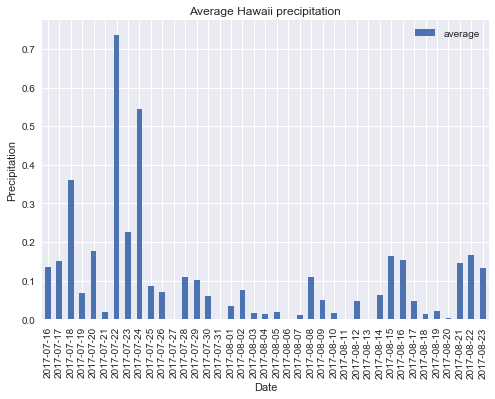

In [279]:
# Plot the results using the DataFrame plot method.

# Use Pandas to print the summary statistics for the precipitation data.
prcp_df = pd.DataFrame(prcp_averages, columns=['date','average'])
prcp_df.set_index('date', inplace=True)

prcp_df.plot.bar()

plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Average Hawaii precipitation")
plt.show()

In [268]:
prcp_df.describe()

,average
count,39.000000
mean,0.106709
std,0.148860
min,0.000000
25%,0.017500
50%,0.062000
75%,0.140000
max,0.736667


In [269]:
# Station Analysis


# Design a query to calculate the total number of stations.
total_stations = session.query(Measurement.station).group_by(Measurement.station).all()
print(len(total_stations))
# Design a query to find the most active stations.

most_active = session.query(Measurement.station, Measurement.tobs).\
group_by(Measurement.station).\
order_by(Measurement.tobs.desc()).all()
print(most_active)
# List the stations and observation counts in descending order
# Which station has the highest number of observations?

active_df = pd.DataFrame(most_active, columns=["station", "temp observation"])
print(active_df)

highest_observation = active_df.loc[0]
print(highest_observation)


9
[('USC00514830', 82), ('USC00519523', 82), ('USC00517948', 81), ('USC00519397', 81), ('USC00519281', 79), ('USC00513117', 77), ('USC00516128', 76), ('USC00518838', 70), ('USC00511918', 64)]
       station  temp observation
0  USC00514830                82
1  USC00519523                82
2  USC00517948                81
3  USC00519397                81
4  USC00519281                79
5  USC00513117                77
6  USC00516128                76
7  USC00518838                70
8  USC00511918                64
station             USC00514830
temp observation             82
Name: 0, dtype: object


In [270]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
obs_data = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()
obs_data


[('2017-07-16', 'USC00519397', 78),
 ('2017-07-16', 'USC00513117', 76),
 ('2017-07-16', 'USC00514830', 79),
 ('2017-07-16', 'USC00519523', 82),
 ('2017-07-16', 'USC00519281', 80),
 ('2017-07-16', 'USC00516128', 75),
 ('2017-07-16', 'USC00519397', 78),
 ('2017-07-16', 'USC00513117', 76),
 ('2017-07-16', 'USC00514830', 79),
 ('2017-07-16', 'USC00519523', 82),
 ('2017-07-16', 'USC00519281', 80),
 ('2017-07-16', 'USC00516128', 75),
 ('2017-07-17', 'USC00519397', 80),
 ('2017-07-17', 'USC00513117', 75),
 ('2017-07-17', 'USC00514830', 82),
 ('2017-07-17', 'USC00519523', 82),
 ('2017-07-17', 'USC00519281', 76),
 ('2017-07-17', 'USC00516128', 72),
 ('2017-07-17', 'USC00519397', 80),
 ('2017-07-17', 'USC00513117', 75),
 ('2017-07-17', 'USC00514830', 82),
 ('2017-07-17', 'USC00519523', 82),
 ('2017-07-17', 'USC00519281', 76),
 ('2017-07-17', 'USC00516128', 72),
 ('2017-07-18', 'USC00519397', 80),
 ('2017-07-18', 'USC00513117', 78),
 ('2017-07-18', 'USC00514830', 82),
 ('2017-07-18', 'USC00517948

In [271]:
# Filter by the station with the highest number of observations.

highest_station = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.tobs.desc()).all()
    
highest_df = pd.DataFrame(highest_station, columns=["date", "station", "temp observation"])
print(highest_df.head())

highest_obs = highest_df.loc[0]
print(highest_obs)





         date      station  temp observation
0  2017-08-19  USC00519523                85
1  2017-08-19  USC00519523                85
2  2017-07-26  USC00519523                84
3  2017-07-30  USC00519523                84
4  2017-08-13  USC00519523                84
date                 2017-08-19
station             USC00519523
temp observation             85
Name: 0, dtype: object


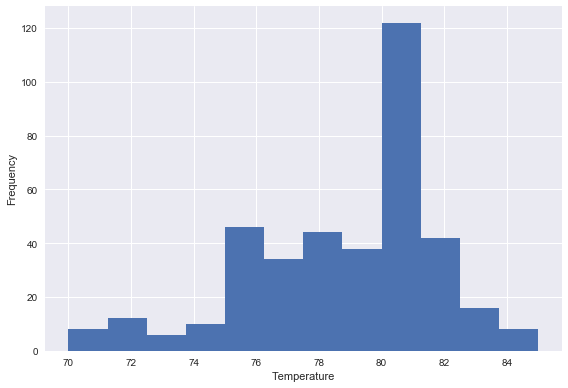

In [272]:
# Plot the results as a histogram with bins=12.


bins = 12
plt.hist(highest_df["temp observation"], bins)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()

In [273]:
# Temperature Analysis

# Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

# Plot the min, avg, and max temperature from your previous query as a bar chart.

# Use the average temperature as the bar height.
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

def calc_temps(start_date, end_date):
    dates = [start_date, end_date]
    new_dates = []
    for date in dates:
        date_list = date.split("-")
        date_list[0] = str(int(date_list[0]) - 1)
        new_date = "-".join(date_list)
        new_dates.append(new_date)
    print(new_dates) 
    
    temp_values = session.query(Measurement.tobs)\
    .filter(Measurement.date >= new_dates[0], Measurement.date <= new_dates[1]).all()
    temp_values_list = [x for (x,) in temp_values]
    avg_temp = np.mean(temp_values_list)
    max_temp = max(temp_values_list)
    min_temp = min(temp_values_list)
    
    plt.figure(figsize=(2,5))    
    plt.title("Trip Average Temp")
    plt.ylabel("Temperature")
    plt.bar(1, avg_temp, yerr = (max_temp - min_temp), tick_label = "")
    plt.show()

['2016-08-23', '2017-08-23']


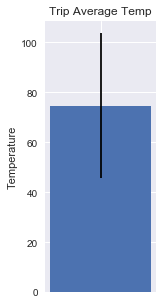

In [274]:
calc_temps('2017-08-23', '2018-08-23')

In [277]:
# Step 4 - Climate App

# Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.

# Use FLASK to create your routes.
from flask import Flask, jsonify

app = Flask(__name__)
# Routes

# /api/v1.0/precipitation
@app.route("/api/v1.0/precipitation")
# Query for the dates and temperature observations from the last year.
def precipitation():    
    flask_prcp_data = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date > year_ago).\
        order_by(Measurement.date).all()
# Convert the query results to a Dictionary using date as the key and prcp as the value.    
    all_dates = dict(np.ravel(flask_prcp_data))

# Return the JSON representation of your dictionary.
    return jsonify(all_dates)
# /api/v1.0/stations
@app.route("/api/v1.0/stations")
# Return a JSON list of stations from the dataset.
def stations():
    flask_total_stations = session.query(Measurement.station).group_by(Measurement.station).all()
    
    all_stations = dict(np.ravel(flask_prcp_data))
    
    return jsonify(all_stations)
# /api/v1.0/tobs
@app.route("/api/v1.0/tobs")
# Return a JSON list of Temperature Observations (tobs) for the previous year
def tobs():
    flask_obs_data = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()
    
    all_tobs = dict(np.ravel(flask_prcp_data))
    
    return jsonify(all_tobs)
# /api/v1.0/<start> and /api/v1.0/<start>/<end>
#@app.route("/api/v1.0/start")

# Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
# When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
# When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.

#if __name__ == '__main__':
 #   app.run(debug=True)